# ADAM NOWAK
https://www.geeksforgeeks.org/recommendation-system-in-python/

### CONTENT-BASED RECOMMENDATION SYSTEM 
#### Item profile
1. TF - term frequency -  It displays the regularity with which a certain term or word occurs in a text corpus or document. - IS USED TO RANK TERM in the document - identifying important terms in the document
2. IDF - inverse document frequency - is employed in text analysis and information retrieval to evaluate the significance of phrases within a set of documents. IDF measures how uncommon or unique a term is in the corpus. - common terms has low ITF values, when rare items high. 

We're going to use TF-IDF vectorizer to count the number of times element appear and to measure how significant its role is. 

$TF-IDFscore(w_{ij}) = TF_{ij} * IDF_i$

#### User profile 
User profile is a vector which describes user preferences. 
During the creation of the user’s profile, we use a utility matrix that describes the relationship between user and item. 


Problems which this system contains: 
1. Finding the appropriate feature is hard.
2. Doesn’t recommend items outside the user profile.

## Collaborative Filtering
Collaborative filtering is based on the idea that similar people (based on the data) generally tend to like similar things. It predicts which item a user will like based on the item preferences of other similar users. 

This system uses user-item matrix to generate recommendations. 
This matrix contains the values that indicate a user’s preference towards a given item. These values can represent either explicit feedback (direct user ratings) or implicit feedback (indirect user behavior such as listening, purchasing, watching).
1. explicit feedback - the amount of data collected from the users when they choose to do so (personal ratings). - USER TELLS WHAT he/she LIKES!
2. implicit feedback - we track user behavior to predict their preference. - we try to infer what she/he likes from usage data. 

Problems: 
1. Hard to find new features which improves quality of the model. 
2. cannot handle fresh item - cold start. 


### General Information: 
#### Problems: 
1. Cold start problem. 
2. evolving with time. 
3. scalability 

#### Approaches to build such a system: 
1. Popularity 
2. Classification model - based on some features like (purchase history or product info classifier can count the probability that the user will buy some product) - less efficient than collaborative filtering methods. 
3. co-occurrence 
4. matrix factorization 




# Book recommendation system

In [60]:
import numpy as np
import pandas as pd

books_df = pd.read_csv('Books.csv')
ratings_df = pd.read_csv('Ratings.csv')
users_df = pd.read_csv('Users.csv')

/var/folders/1_/_d0g9n0d6qg8j72vvxsrnksw0000gn/T/ipykernel_41554/2779536466.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv('Books.csv')


In [61]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [62]:
books_df = books_df[['ISBN', 'Book-Title', 'Book-Author']]
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ISBN         271360 non-null  object
 1   Book-Title   271360 non-null  object
 2   Book-Author  271358 non-null  object
dtypes: object(3)
memory usage: 6.2+ MB


In [63]:
books_df.dropna(inplace=True)

In [64]:
books_df.shape

(271358, 3)

In [65]:
ratings_df.shape

(1149780, 3)

In [66]:
ratings_df = ratings_df.dropna(subset=['ISBN', 'Book-Rating'])

In [67]:
#merging datasets and dropping useless columns 
book_user_rating = books_df.merge(ratings_df, on='ISBN', how='inner')
book_user_rating = book_user_rating[['ISBN', 'Book-Title', 'Book-Author', 'User-ID', 'Book-Rating']]

book_user_rating.head(10)

,ISBN,Book-Title,Book-Author,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,41385,0
5,0002005018,Clara Callan,Richard Bruce Wright,67544,8
6,0002005018,Clara Callan,Richard Bruce Wright,85526,0
7,0002005018,Clara Callan,Richard Bruce Wright,96054,0
8,0002005018,Clara Callan,Richard Bruce Wright,116866,9
9,0002005018,Clara Callan,Richard Bruce Wright,123629,9


In [68]:
users_df.head(10)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
8,9,"germantown, tennessee, usa",NaN
9,10,"albacete, wisconsin, spain",26.0


In [69]:
print(f"Unique users: {ratings_df['User-ID'].nunique()}")
print(f"Unique books: {ratings_df['ISBN'].nunique()}")

Unique users: 105283
Unique books: 340556


In [70]:
#list of some books
selected_books = ["Where the Heart Is (Oprah's Book Club (Paperback))",
                  "The Surgeon",
                  "I Know This Much Is True"]

filtered_books = book_user_rating[book_user_rating['Book-Title'].isin(selected_books)]

#gruop by title and count reviews 
reviews_count = filtered_books.groupby('Book-Title')['Book-Rating'].count()

print(reviews_count)

Book-Title
I Know This Much Is True                              276
The Surgeon                                           175
Where the Heart Is (Oprah's Book Club (Paperback))    585
Name: Book-Rating, dtype: int64


In [71]:
book_user_rating.shape

(1031134, 5)

#### Only books with more than 100 reviews and users with more than 20 reviews 

In [72]:
book_counts = book_user_rating['Book-Title'].value_counts()
popular_books = book_counts[book_counts > 100].index
filtered_books = book_user_rating[book_user_rating['Book-Title'].isin(popular_books)]
filtered_books.shape

(182799, 5)

In [73]:
user_counts = filtered_books['User-ID'].value_counts()
active_users = user_counts[user_counts > 20].index
filtered_data = filtered_books[filtered_books['User-ID'].isin(active_users)]
filtered_data.shape

(92883, 5)

In [74]:
prepared_data = filtered_data.sort_values(by=['Book-Title', 'User-ID'])
prepared_data.shape

(92883, 5)

In [75]:
prepared_data.head(5)

,ISBN,Book-Title,Book-Author,User-ID,Book-Rating
94366,0451524934,1984,George Orwell,254,9
240083,0451519841,1984,George Orwell,7346,8
94372,0451524934,1984,George Orwell,11676,0
240085,0451519841,1984,George Orwell,11676,0
307406,0452262933,1984,George Orwell,11676,10


In [76]:
pivot_table = prepared_data.pivot_table(
    index='Book-Title',        
    columns='User-ID',   
    values='Book-Rating',   
    fill_value=0            
)

pivot_table.head()

User-ID,243,254,507,638,882,1131,1435,1848,1903,2033,...,276231,276463,276680,277195,277427,277639,278144,278418,278535,278633
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0
24 Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Books in rows, users in columns! 

In [77]:
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier

In [78]:
matrix = pivot_table.values
#training model with cosine metric
knn_model = NearestNeighbors(metric='cosine', algorithm='auto')
knn_model.fit(matrix)

NearestNeighbors(metric='cosine')

In [79]:
distances, indices = knn_model.kneighbors(matrix, n_neighbors=5)

In [80]:
pivot_table.iloc[indices[6]].index.values

array(['A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash',
       "Schindler's List", 'Plum Island', 'Four Blondes',
       'Chasing the Dime'], dtype=object)

In [81]:
def book_recommendations(book_title):
    try:
        book = pivot_table.loc[book_title]
        
        distances, indices = knn_model.kneighbors([book.values], n_neighbors=6)
        
        recommended_books = pd.DataFrame({
            'title':  pivot_table.iloc[indices[0]].index.values,
            'distance': distances[0],
        }).sort_values(by="distance", ascending=False)
        
        return recommended_books
    except Exception as e:
        return str(e)
        
book_title = "The Catcher in the Rye"  
recommended_books = book_recommendations(book_title)
recommended_books

,title,distance
5,Lord of the Flies,0.822362
4,Catch 22,0.822274
3,Brave New World,0.820174
2,To Kill a Mockingbird,0.809455
1,The Great Gatsby,0.792062
0,The Catcher in the Rye,0.000000


In [82]:
book_recommendations("The Surgeon")

,title,distance
5,Seven Up (A Stephanie Plum Novel),7.700975e-01
4,The Mulberry Tree,7.616649e-01
3,Hard Eight : A Stephanie Plum Novel (A Stephan...,7.537151e-01
2,Mercy,7.407656e-01
1,"Forever... : A Novel of Good and Evil, Love an...",7.300370e-01
0,The Surgeon,1.110223e-16


In [83]:
book_title = "1984"
recommended_books = book_recommendations(book_title)
recommended_books

,title,distance
5,"The Vampire Lestat (Vampire Chronicles, Book II)",8.041461e-01
4,Slaughterhouse Five or the Children's Crusade:...,8.018863e-01
3,The Handmaid's Tale,7.950270e-01
2,Brave New World,7.914254e-01
1,Animal Farm,7.287061e-01
0,1984,1.110223e-16


#### Results 
Distance in cosine metric is a value from 0 to 1, where 0 means no similarities and 1 means full agreement. On the example of book called "1984" we can observe that our system is working correctly returning 5 books with distance close to 1, so they are pretty similar to the "1984" in the aspect of RATING value. We can see that even "Animal Farm" is on the list with btw is another George Orwell book ;))

### CSR matrix method on full book_user_ratings matrix 

In [84]:
from scipy.sparse import csr_matrix

#filtering data
book_counts= book_user_rating['Book-Title'].value_counts()
popular_books = book_counts[book_counts > 10].index
filtered_books = book_user_rating[book_user_rating['Book-Title'].isin(popular_books)]

user_counts = filtered_books['User-ID'].value_counts()
active_users = user_counts[user_counts > 5].index
filtered_data = filtered_books[filtered_books['User-ID'].isin(active_users)]

prepared_data_csr = filtered_data.sort_values(by=['Book-Title', 'User-ID'])

#mapping because its easier to use 0,1,2... values then ISBN numbers or user ids

user_id_mapping = {user_id: idx for idx, user_id in enumerate(prepared_data_csr['User-ID'].unique())}
isbn_mapping = {isbn: idx for idx, isbn in enumerate(prepared_data_csr['ISBN'].unique())}

book_user_rating_csr = prepared_data_csr.copy()

#mapping to used is and isbn to numeric values
book_user_rating_csr['user_idx'] = book_user_rating_csr['User-ID'].map(user_id_mapping)
book_user_rating_csr['isbn_idx'] = book_user_rating_csr['ISBN'].map(isbn_mapping)

rows = book_user_rating_csr['user_idx'].values
cols = book_user_rating_csr['isbn_idx'].values
data = book_user_rating_csr['Book-Rating'].values

#creating csr matrix 
csr_matrix_data = csr_matrix((data, (rows, cols)), shape=(len(user_id_mapping), len(isbn_mapping)))

#basic matrix info 
print(f"Shape of the matrix: {csr_matrix_data.shape}")
print(f"Number of non-zero elements: {csr_matrix_data.nnz}")


Shape of the matrix: (11953, 29036)
Number of non-zero elements: 463418


Calculating similarities between books and searching for recommendation based on one book. Item-based Collaborative Filtering

In [85]:
from sklearn.neighbors import NearestNeighbors

knn_csr_model = NearestNeighbors(metric='cosine', algorithm='auto', n_neighbors=6) 
knn_csr_model.fit(csr_matrix_data.T)  

NearestNeighbors(metric='cosine', n_neighbors=6)

In [86]:
distances, indices = knn_csr_model.kneighbors(csr_matrix_data.T[0], n_neighbors=6)

for i, (idx, distance) in enumerate(zip(indices.flatten(), distances.flatten())):
    print(f"{i+1}. Book Index: {idx}, Distance: {distance}")

1. Book Index: 0, Distance: 0.0
2. Book Index: 11781, Distance: 0.4021654953349484
3. Book Index: 8744, Distance: 0.40357627844090105
4. Book Index: 18317, Distance: 0.42829025984821
5. Book Index: 14178, Distance: 0.4319983689733131
6. Book Index: 14233, Distance: 0.4321229678189916


In [87]:
def book_recommendations_csr_matrix(book_title):
    try:
        #finding ISBN value based on title
        book_isbn = books_df.loc[books_df['Book-Title'] == book_title, 'ISBN']
        if book_isbn.empty:
            return "Book not found in the dataset."
        book_isbn = book_isbn.values[0]
        
        #get book index in mapping
        book_idx = isbn_mapping.get(book_isbn)
        if book_idx is None:
            return "Book not found in the dataset."

        distances, indices = knn_csr_model.kneighbors(csr_matrix_data.T[book_idx], n_neighbors=6)
        
        #creating a list of recommendations
        rec_books = []
        for idx, distance in zip(indices.flatten(), distances.flatten()):
            if idx != book_idx:  
                similar_isbn = list(isbn_mapping.keys())[list(isbn_mapping.values()).index(idx)]
                similar_book_title = books_df.loc[books_df['ISBN'] == similar_isbn, 'Book-Title'].values[0]
                rec_books.append({'title': similar_book_title, 'distance': distance})
        
        #converting a list to dataframe for cooler display
        recommended_books = pd.DataFrame(rec_books).sort_values(by="distance", ascending=False)
        
        return recommended_books

    except Exception as e:
        return str(e)

book_recommendations_csr_matrix("1984")

,title,distance
4,Far from the Madding Crowd,0.842614
3,S.,0.837060
2,We,0.827236
1,The Cigarette Girl: A Novel,0.826642
0,Animal Farm,0.817231


In [88]:
book_recommendations_csr_matrix("The Surgeon")

,title,distance
4,Premeditated Marriage,0.787090
0,Wildest Hearts,0.766365
1,Priceless,0.766365
2,Second Chances,0.766365
3,Impetuous,0.766365


### Results knn and CSR matrix
The difference here is that I used csr matrix == sparse matrix, so in this case matrix contains only not null values, where in the pivot_table we filled every null with 0. CSR matrix allows me to analyse much more examples of books and users, because on the lower complexity. CSR matrix is much more efficient and is scaling up way better in comparison with typical pivot table, which is a full matrix . 

##### Key elements: 
CSR Matrix: Efficiently stores the user-book rating data.

Cosine Similarity: Measures the similarity between books based on how similarly users rated them.

KNN: Finds the most similar books to a given book based on the calculated similarity scores.

#### This is a Item-based Collaborative Filtering.

This is an approach, where recommendations are based on the ratings that other users have given to books. In this example, we aim to recommend books that are most similar in terms of user ratings to the input book (the book for which we want to find recommendations).


### User-based Collaborative Filtering

In this approach we generated recommendations based on the other users preferences. So for example we are returning a books that other users similar to us rated high. So we assume that is users are similar/rated many books in the same way, they probably have same taste in books. 


Data filtration and csr matrix creation was done before, so we are using the same one here. 

In [113]:
#now we dont need to transpose matrix!
from sklearn.neighbors import NearestNeighbors

knn_csr_model_user_based = NearestNeighbors(metric='cosine', algorithm='auto', n_neighbors=4) 
knn_csr_model_user_based.fit(csr_matrix_data)  

NearestNeighbors(metric='cosine', n_neighbors=4)

In [114]:
#comparing similarities between users not items like before - finding similar users
distances, indices = knn_csr_model_user_based.kneighbors(csr_matrix_data[0], n_neighbors=4)  

#close users to user 0
for i, (idx, distance) in enumerate(zip(indices.flatten(), distances.flatten())):
    print(f"{i + 1}. User Index: {idx}, Distance (cosine): {distance}")


1. User Index: 0, Distance (cosine): 4.6629367034256575e-15
2. User Index: 80, Distance (cosine): 0.8643350918164573
3. User Index: 444, Distance (cosine): 0.8825313649582492
4. User Index: 438, Distance (cosine): 0.89387378266291


In [115]:
#list of the similar users 
similar_users = indices.flatten()[1:] 

#collecting books rated above 8 by the similar users 
books_rated_by_similar_users = book_user_rating_csr[book_user_rating_csr['user_idx'].isin(similar_users)]
books_rated_by_similar_users = books_rated_by_similar_users[books_rated_by_similar_users['Book-Rating'] > 8]
books_rated_by_similar_users = books_rated_by_similar_users[['Book-Title', 'Book-Rating', 'User-ID']].drop_duplicates(subset='Book-Title')

books_rated_by_similar_users

,Book-Title,Book-Rating,User-ID
94436,1984,10,95359
86210,1st to Die: A Novel,9,16795
484065,A Book of Angels,9,16795
126648,"A Child Called \It\"": One Child's Courage to S...",10,16795
273063,A Cry In The Night,9,104636
...,...,...,...
485653,Without a Doubt,9,16795
151989,"Word Freak: Heartbreak, Triumph, Genius, and O...",10,95359
177363,Year of Wonders,10,95359
110111,You Belong To Me,9,104636


As we can observe there is a lot of books rated higher than 8, by this 3 similar readers! So in the function below I focused on only 2 closest neighbours and ratings == 9 or 10, because we want to recommend only the best books.  

In [144]:
def find_personal_books_recommendations(user_id): 
    try: 
        distances, indices = knn_csr_model_user_based.kneighbors(csr_matrix_data[user_id], n_neighbors=4)  
    
        similar_users = indices.flatten()[1:3] 

        #collecting books rated above 8 by the similar users 
        books_rated_by_similar_users = book_user_rating_csr[book_user_rating_csr['user_idx'].isin(similar_users)]
        books_rated_by_similar_users = books_rated_by_similar_users[books_rated_by_similar_users['Book-Rating'] > 8]
        books_rated_by_similar_users = books_rated_by_similar_users[['Book-Title', 'Book-Rating', 'User-ID']].drop_duplicates(subset='Book-Title')
        
        if books_rated_by_similar_users.empty:
            return "No books found with rating above 8 from similar users."
        return books_rated_by_similar_users
        
    
    except Exception as e:
        return str(e)

find_personal_books_recommendations(55)


,Book-Title,Book-Rating,User-ID
181400,Slaughterhouse Five or the Children's Crusade:...,10,258717
736304,"The Drawing of the Three (The Dark Tower, Book 2)",9,77517
228464,"The Gunslinger (The Dark Tower, Book 1)",9,77517
736293,"The Waste Lands (The Dark Tower, Book 3)",9,77517
500108,Timequake,10,258717
470837,"Wizard and Glass (The Dark Tower, Book 4)",9,77517


### Conclusion User-based collaborative-filtering recommendations: 

In this approach, I used the same CSR matrix that was initially created for item-based recommendations. However, unlike item-based filtering, there's no need to transpose the matrix for training the model, as we're focusing on user-based recommendations.

The data has been filtered to include only users who have rated more than 5 books and books that have received more than 10 ratings. This ensures that recommendations are based on sufficiently large datasets. While it is possible that some users may not have book recommendations with ratings over 8, this is quite rare.

I also used the KNN algorithm with cosine similarity as the distance metric to identify the nearest neighbors for each user.


# Spotify tracks recommendation system 

I decided to use another dataset because in the first one we only have one features that we can base our recommendation on, here we have multiple. For example: anceability, energy, loudness, tempo, acousticness etc. 

#### So this dataset is good to present content-based recommendation system!

https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset/data

In [3]:
spotify_df = pd.read_csv("dataset.csv")

In [4]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [5]:
spotify_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [6]:
spotify_df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [4]:
spotify_df.dropna(subset=['track_name'], inplace=True)

In [8]:
spotify_df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

### Clustering 

Clustering when creating a recommendation system might be super useful, because based on track audio features we can group up similar tracks for playlist for example. 

In [9]:
num_unique_genres = spotify_df['track_genre'].nunique()
print(num_unique_genres)


114


In [10]:
#numeric values for clustering 
spotify_df_for_clustering = spotify_df[['danceability', 'energy', 'loudness', 'tempo', 
                                        'speechiness', 'acousticness', 'instrumentalness', 
                                        'liveness', 'valence', 'popularity', 'duration_ms', 
                                        'key', 'mode', 'time_signature']].copy()

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
spotify_scaled = scaler.fit_transform(spotify_df_for_clustering)

In [12]:
from sklearn.cluster import KMeans

K_means = KMeans(n_clusters=4, random_state=40)
spotify_clusters = K_means.fit_predict(spotify_scaled)

spotify_df_for_clustering['cluster'] = spotify_clusters



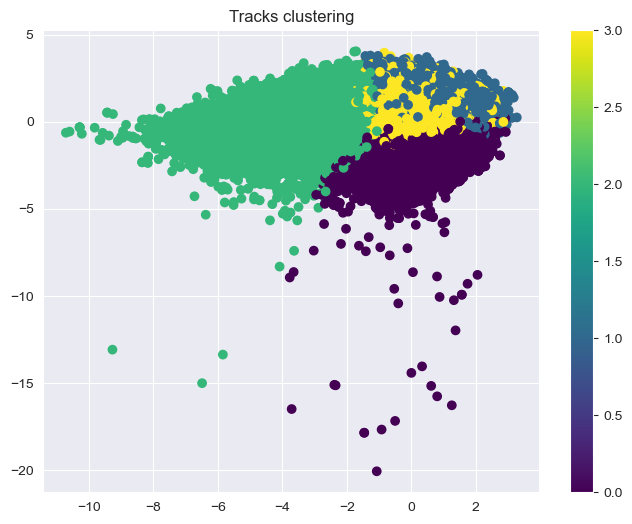

In [13]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(spotify_scaled)

#cluster visualisation 
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=spotify_clusters, cmap='viridis', alpha=1)
plt.colorbar()
plt.title("Tracks clustering")
plt.show()

In [14]:
#checking if tracks from the same cluster belong to the same genre 
spotify_df_for_clustering['track_genre'] = spotify_df['track_genre']

In [15]:
genre_cluster_counts = spotify_df_for_clustering.groupby(['cluster', 'track_genre']).size().reset_index(name='count')
genre_cluster_counts = genre_cluster_counts.sort_values(by=['cluster', 'count'], ascending=[True, False])
genre_cluster_counts

,cluster,track_genre,count
42,0,grindcore,967
22,0,death-metal,943
6,0,black-metal,941
46,0,happy,836
49,0,hardstyle,829
...,...,...,...
363,3,detroit-techno,24
361,3,death-metal,22
384,3,happy,10
430,3,romance,7


In [16]:
cluster_0_data = genre_cluster_counts[genre_cluster_counts['cluster'] == 0]
popular_genres_in_cluster_0 = cluster_0_data[cluster_0_data['count'] > 500]

print(popular_genres_in_cluster_0[['track_genre', 'count']])

        track_genre  count
42        grindcore    967
22      death-metal    943
6       black-metal    941
46            happy    836
49        hardstyle    829
27    drum-and-bass    825
50      heavy-metal    812
72        metalcore    804
110          trance    746
29          dubstep    623
18           comedy    619
58       industrial    601
48         hardcore    543
41             goth    541
73   minimal-techno    534
10        breakbeat    531
109          techno    531
44           grunge    528


In [17]:
cluster_3_data = genre_cluster_counts[genre_cluster_counts['cluster'] == 3]
popular_genres_in_cluster_3 = cluster_3_data[cluster_3_data['count'] > 500]
print(popular_genres_in_cluster_3[['track_genre', 'count']])

    track_genre  count
418    pop-film    868
402       k-pop    823
431         sad    709
362  deep-house    649
393      indian    638
407    mandopop    638
354       chill    612
417         pop    609
372         emo    599
448     turkish    583
389     hip-hop    534
434   sertanejo    530


In [18]:
cluster_2_data = genre_cluster_counts[genre_cluster_counts['cluster'] == 2]
popular_genres_in_cluster_2 = cluster_2_data[cluster_2_data['count'] > 500]

cluster_1_data = genre_cluster_counts[genre_cluster_counts['cluster'] == 1]
popular_genres_in_cluster_1 = cluster_1_data[cluster_1_data['count'] > 500]

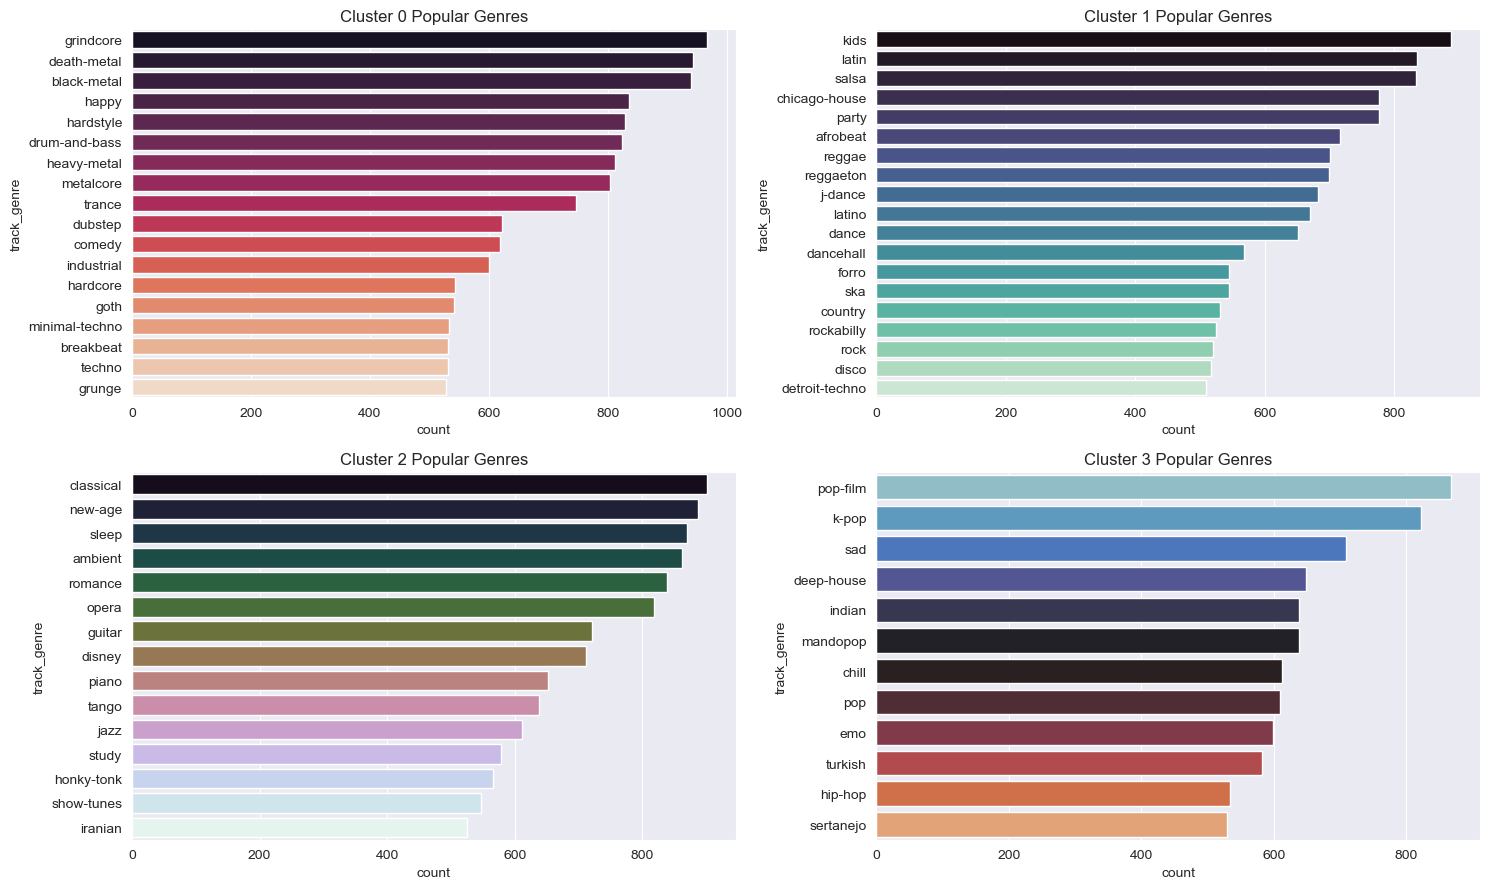

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 2, figsize=(15, 9))

sns.barplot(x='count', y='track_genre', data=popular_genres_in_cluster_0, ax=ax[0, 0], palette="rocket", hue="track_genre")
ax[0, 0].set_title('Cluster 0 Popular Genres')

sns.barplot(x='count', y='track_genre', data=popular_genres_in_cluster_1, ax=ax[0, 1], palette="mako", hue="track_genre")
ax[0, 1].set_title('Cluster 1 Popular Genres')

sns.barplot(x='count', y='track_genre', data=popular_genres_in_cluster_2, ax=ax[1, 0], palette="cubehelix", hue="track_genre")
ax[1, 0].set_title('Cluster 2 Popular Genres')

sns.barplot(x='count', y='track_genre', data=popular_genres_in_cluster_3, ax=ax[1, 1], palette="icefire", hue="track_genre")
ax[1, 1].set_title('Cluster 3 Popular Genres')

plt.tight_layout()
plt.show()


On the plots above we can observe that sometimes clustering is working really well. For example in cluster 0 we have few types of metal which as we know are similar and many variations of techno which also are close to each other. Same in other Cluster, so we can say that K-means clustering in this case is returning pretty solid results. 

### Moving on to the content-based recommendation system for spotify songs!

In [20]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   track_id          113999 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        113999 non-null  int64  
 6   duration_ms       113999 non-null  int64  
 7   explicit          113999 non-null  bool   
 8   danceability      113999 non-null  float64
 9   energy            113999 non-null  float64
 10  key               113999 non-null  int64  
 11  loudness          113999 non-null  float64
 12  mode              113999 non-null  int64  
 13  speechiness       113999 non-null  float64
 14  acousticness      113999 non-null  float64
 15  instrumentalness  113999 non-null  float64
 16  liveness          113999 

In [36]:
#features which will be used to find perfect recommendation based on the track_id
spotify_df_for_rec = spotify_df[spotify_df['popularity'] > 50].reset_index(drop=True) #popularity over 50 

features_for_recommendation = ['danceability', 'energy', 'valence', 
    'tempo', 'speechiness', 'acousticness', 'instrumentalness', 'liveness']

spotify_df_for_rec_val = spotify_df_for_rec[features_for_recommendation]
spotify_df_for_rec.head(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [37]:
spotify_df_for_rec_val.shape

(27770, 8)

In [38]:
from sklearn.preprocessing import StandardScaler
#features normalisation 
scalar = StandardScaler()
spotify_df_for_rec_scaled = scalar.fit_transform(spotify_df_for_rec_val)

In [39]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD

#matrix factorization 
svd = TruncatedSVD(n_components=5, random_state=42)  
latent_features = svd.fit_transform(spotify_df_for_rec_scaled)

similarity_matrix = cosine_similarity(latent_features)

In [49]:
def recommended_tracks(track_name): 
    if track_name not in spotify_df_for_rec['track_name'].values: 
        return f"{track_name} doesn't exist in the database"
    
    track_index = spotify_df_for_rec[spotify_df_for_rec['track_name'] == track_name].index[0] 
    similarity_scores = similarity_matrix[track_index]
    
    similar_indices = similarity_scores.argsort()[::-1]  
    
    similar_indices = similar_indices[1:10]
    
    similar_songs = spotify_df_for_rec.iloc[similar_indices][['track_name', 'artists', 'popularity']]
    similar_songs['similarity_score'] = similarity_scores[similar_indices]
    
    return similar_songs

HERE I used TruncatedSVD which is a form of matrix factorization. (po polsku abym potem jak do teog wróce lepiej przypoieć sobie) Najpierw dzięki temu SVD zredukowałem liczbe wymiarów cech z 8 do 5 w taki sposób, że przechowują one najistotniejsze info o piosenkach. Next I used cosine similarity to calculate similarity between songs based on the created 5 features with SVD. Adn then with recommended_tracks function I seperated 9 tracks which are the most similar to the main one. 

In [43]:
track_name = "Shape of You"  
recommended_tracks(track_name)

,track_name,artists,popularity,similarity_score
3343,Dinosaur Stomp,Mother Goose Club,56,0.997090
3224,Polly Put the Kettle On,CoComelon,61,0.995980
5044,Pull Up,Timaya;Burna Boy,53,0.993266
3385,The Ants Go Marching,Super Simple Songs,54,0.992722
3206,The Wheels on the Bus,The Little Sunshine Kids,66,0.988459
4874,Mad Over You,Runtown,58,0.987714
4975,Options,NSG;Tion Wayne,56,0.987062
3220,Itsy Bitsy Spider,Itsy Bitsy Spider Kids,59,0.987014
27437,Happy,Rae & Christian;Mark Foster,55,0.986919


In [50]:
recommended_tracks("Trap Queen")

,track_name,artists,popularity,similarity_score
14779,Trap Queen,Fetty Wap,74,1.000000
24210,Gordinho Saliente - Ao Vivo,Henrique & Juliano,54,0.989003
5789,Rise Up - Radio Edit,Yves Larock,63,0.984765
19927,"Boom Padi (From ""Maja Ma"")",Shreya Ghoshal;Osman Mir;Souumil Shringarpure;...,57,0.983468
22125,That's Not My Name,The Ting Tings,58,0.976844
1970,Wozwald,Yuu Miyashita;NILFRUITS,53,0.976011
1819,BANG!!!,EGOIST,54,0.975151
15103,BANG!!!,EGOIST,54,0.975151
15308,BANG!!!,EGOIST,54,0.975151


In [ ]:
recommended_tracks(track_name)

##### KNN - nearest neighbour algorithm 


In [57]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors=10, metric='cosine')  
knn.fit(spotify_df_for_rec_scaled)

NearestNeighbors(metric='cosine', n_neighbors=10)

In [58]:
def recommended_tracks_knn(track_name): 
    if track_name not in spotify_df_for_rec['track_name'].values: 
        return f"{track_name} doesn't exist in the database"
    
    track_index = spotify_df_for_rec[spotify_df_for_rec['track_name'] == track_name].index[0] 
    
    distances, indices = knn.kneighbors(spotify_df_for_rec_scaled[track_index].reshape(1, -1))
    
    similar_songs = spotify_df_for_rec.iloc[indices[0]][['track_name', 'artists', 'popularity']]
    
    similarity_scores = 1 - distances[0]  #knn returns distance value so similarity score is 1 - this distance to main track 
    similar_songs['similarity_score'] = similarity_scores

    return similar_songs[['track_name', 'artists', 'popularity', 'similarity_score']]

track_name = 'Shape of You' 
recommended_tracks_knn(track_name)

,track_name,artists,popularity,similarity_score
20039,Shape of You,Ed Sheeran,86,1.000000
24112,Brujeria,El Gran Combo De Puerto Rico,65,0.981691
5044,Pull Up,Timaya;Burna Boy,53,0.979611
26077,El aire de la calle,Los Delinquentes,61,0.976619
5039,Low,Larry Gaaga;Wizkid,54,0.973491
4904,More Life,Burna Boy,57,0.970155
5881,Copacabana (At the Copa),Barry Manilow,56,0.969767
3965,hello hello!,Yxngxr1,58,0.968867
23854,hello hello!,Yxngxr1,58,0.968867
4773,On the Low,Burna Boy,74,0.963198


As we can observe KNN technique returns a bit different results, but some songs appeared in both tables. Results might be different because in this case we used all 8 original audio features, so I don't used SVD in this case. With knn we are using cosine metric to find closest neighbours to the main song. 

### Conclusion 
Generally, the first technique using SVD and cosine similarity tends to provide higher-quality recommendations because SVD helps to separate and highlight the most important underlying features, reducing noise and capturing the key patterns in the data. However, if the original features are already well-separated and distinct, KNN can also yield great results, offering a simpler approach that works well when the data is already structured in a way that makes the similarities between songs clear. 